In [2]:
conda activate gpu_env


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

     -------------------------------------- 284.1/284.1 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 22.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 9.2 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 21.2 MB/s eta 0:00:00
     ------------------------------------ 430.5/430.5 kB 866.5 kB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 8.7 MB/s eta 0:00:00
     -------------------------------------- 1

In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x
import tensorflow.compat.v1 as tf
sess = tf.Session()
a = tf.constant(10)
b = tf.constant(32)
print(sess.run(a+b))

42


In [2]:
# TensorFlow Hello World
import tensorflow as tf
#sess = tf.Session() # This is only needed for TF 1.X
# Computational Graph to be compiled and then run using the session
a = tf.constant(10)
b = tf.constant(32)
# print(sess.run(a+b)) # Not session.run not needed in TF2.X
# In TF2.X eager execution compiles the computation graph in the background
print(a+b) # TF 2.X is more direct. Just write a+b

Tensor("add_1:0", shape=(), dtype=int32)


In [4]:
# Linear Regression using Tensorflow
import tensorflow as tf
# Force TF1.X compatibility mode when using TF 2.X library
tf.compat.v1.disable_eager_execution()
import tensorflow.compat.v1 as tf
import numpy as np

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Before starting, initialize the variables. We will 'run' this first.
init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))
# Learns best fit is W: [0.1], b: [0.3]

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [0.74766] [-0.05419043]
20 [0.23702556] [0.22937894]
40 [0.12862347] [0.28524786]
60 [0.10597921] [0.29691842]
80 [0.10124902] [0.29935628]
100 [0.10026093] [0.29986554]
120 [0.1000545] [0.29997194]
140 [0.10001139] [0.29999414]
160 [0.10000239] [0.2999988]
180 [0.1000005] [0.29999974]
200 [0.10000011] [0.29999995]


In [7]:
%tensorflow_version 1.x
import tensorflow as tf
# Set up a linear classifier.
classifier = tf.estimator.LinearClassifier()
# Train the model on some example data.
classifier.train(input_fn=train_input_fn, steps=2000)
# Use it to predict.
predictions = classifier.predict(input_fn=predict_input_fn)

UsageError: Line magic function `%tensorflow_version` not found.


In [9]:
pip install scikit-learn

     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.2 MB 1.3 MB/s eta 0:00:33
     ---------------------------------------- 0.5/42.2 MB 8.1 MB/s eta 0:00:06
     - -------------------------------------- 1.7/42.2 MB 13.4 MB/s eta 0:00:04
     -- ------------------------------------- 2.9/42.2 MB 18.5 MB/s eta 0:00:03
     --- ------------------------------------ 3.9/42.2 MB 18.9 MB/s eta 0:00:03
     --- ------------------------------------ 4.1/42.2 MB 15.5 MB/s eta 0:00:03
     ---- ----------------------------------- 5.1/42.2 MB 17.2 MB/s eta 0:00:03
     ----- ---------------------------------- 6.2/42.2 MB 18.0 MB/s eta 0:00:02
     ------ --------------------------------- 7.3/42.2 MB 18.7 MB/s eta 0:00:02
     ------- -------------------------------- 7.8/42.2 MB 17.7 MB/s eta 0:00:02
     -------- ------------------------------- 8.9/42.2 MB 17.9 MB/s eta 0:00:02
     --------- ----------------------------- 10.1/

In [39]:


# Using TensorFLow for iris data classification
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
import tensorflow as tf

# Load dataset
iris = datasets.load_iris()
x, y = iris.data, iris.target

# Split dataset into train / test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

# Scale data (training set) to 0 mean and unit standard deviation.
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Set the feature columns
# We use the shape value to define x as 4 column numeric feature input (0..3)
feature_columns = [
        tf.feature_column.numeric_column("x", shape=4)]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns, hidden_units=[20, 30, 20], n_classes=3, optimizer= "Adagrad")

# Train.
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"x" : x_train},
                                                        y = y_train,
                                                        batch_size = 1,
                                                        num_epochs= 10,
                                                        shuffle = True)
classifier.train(input_fn=train_input_fn, steps=1000)

# Eval.
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={ "x" : x_test},
                                                        y = y_test,
                                                        batch_size = 1,
                                                        num_epochs = 10,
                                                        shuffle = True)
scores = classifier.evaluate(input_fn=test_input_fn)
print('Accuracy (tensorflow): {0:f}'.format(scores['accuracy']))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\p2222811\\AppData\\Local\\Temp\\tmpvzcf8yf9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tens

In [29]:
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential([
Dense(12, input_dim=8, activation='relu'),
Dense(8, activation='relu'),
Dense(1, activation='sigmoid')
])

In [30]:
model.add(Dense(32, input_shape=(784,)))

In [31]:
pip install pandas


     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ----------------------------- -------- 266.2/341.8 kB 5.4 MB/s eta 0:00:01
     -------------------------------------  337.9/341.8 kB 7.0 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   -- ------------------------------------- 0.7/10.8 MB 15.7 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.8 MB 17.6 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/10.8 MB 18.7 MB/s eta 0:00:01
   -------------- ------------------------- 3.8/10.8 MB 20.1 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.8 MB 21.6 MB/s eta 0:00:01
   ---------------------- ----------------- 6.1/10.8 MB 22.7 MB/s eta 0:00:01
   -------------------------- ------------- 7.0/10.8 MB 22.5 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/10.8 MB 22.4 MB/s eta 

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
import pandas as pd
import numpy as np

# loading and pre-processing of the data
# We use the 2 class version of iris data set
iris = pd.read_csv("IrisTwoClass.csv")
x = np.array(iris.drop("Class",axis=1))
y = np.array(iris["Class"])

# Split dataset into train / test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

# Scale data (training set) to 0 mean and unit standard deviation.
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# create model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])

# training the model
model.fit(x_train, y_train, epochs=10, batch_size=10)

# eval model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# calculate predictions
predictions = model.predict(x_test)

# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 0.8036 - accuracy: 0.0375
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7604 - accuracy: 0.0500
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7280 - accuracy: 0.1625
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7009 - accuracy: 0.4875
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.8000
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.9375
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.9750
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6079 - accuracy: 0.9750
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5833 - accuracy: 0.9875
Epoch 10/10
1/1 [==============================] - 0s 200ms/step - loss: 0.5483 - accuracy: 0.9000

accuracy: 90.00%
1/1 [==============

In [41]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# This returns a tensor
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
history = model.fit(x_train, y_train,epochs=10, batch_size=10) # starts training

predictions = model.predict(x_test)
print(predictions)

Epoch 1/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1570 - accuracy: 0.6500
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: -0.3788 - accuracy: 0.6750
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: -0.8854 - accuracy: 0.6750
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: -1.4829 - accuracy: 0.6750
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: -2.1795 - accuracy: 0.6750
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: -3.0491 - accuracy: 0.6750
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: -4.1391 - accuracy: 0.6750
Epoch 8/10
12/12 [==============================] - 0s 5ms/step - loss: -5.4027 - accuracy: 0.6750
Epoch 9/10
12/12 [==============================] - 0s 6ms/step - loss: -6.7769 - accuracy: 0.6750
Epoch 10/10
1/1 [==============================] - 0s 50ms/step
[[9.9999762e-01]
 [1.1977748e-03]
 [1.0000000e

In [43]:
pip install matplotlib

     ---------------------------------------- 0.0/155.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/155.5 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  153.6/155.5 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 155.5/155.5 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ------- -------------------------------- 1.4/7.5 MB 43.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.4/7.5 MB 36.2 MB/s eta 0:00:01
   --------------------------- ------------ 5.2/7.5 MB 41.2 MB/s eta 0:00:01
   ------------------------------------ --- 6.9/7.5 MB 39.9 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 39.9 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 39.9 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 39.9 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 22.9 MB/s eta 0:00:00
  

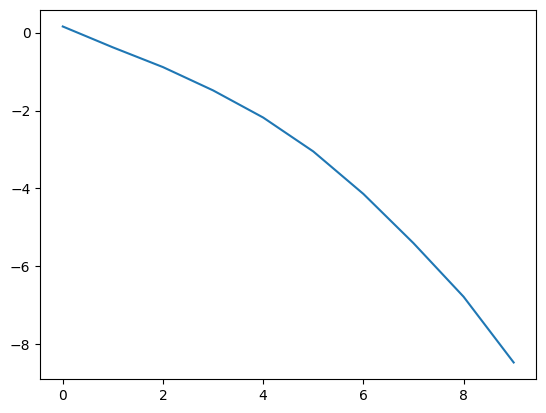

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])


In [37]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_14 (Dense)            (None, 64)                320       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [45]:
pip install visualkeras


     ---------------------------------------- 0.0/43.2 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.2 kB 330.3 kB/s eta 0:00:01
     ----------------------------------- -- 41.0/43.2 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 43.2/43.2 kB 264.1 kB/s eta 0:00:00


In [48]:
import visualkeras
visualkeras.layered_view(model)